# Import Libraries 

In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Loading the data

In [481]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\train.csv")
df_test = pd.read_csv(r"C:\Users\User\Desktop\test.csv")

In [482]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [483]:
df_train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [484]:
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [485]:
df_train.shape

(10000, 12)

In [486]:
df_test.shape

(2500, 11)

In [487]:
df_train.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [488]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [489]:
df_train.corr()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


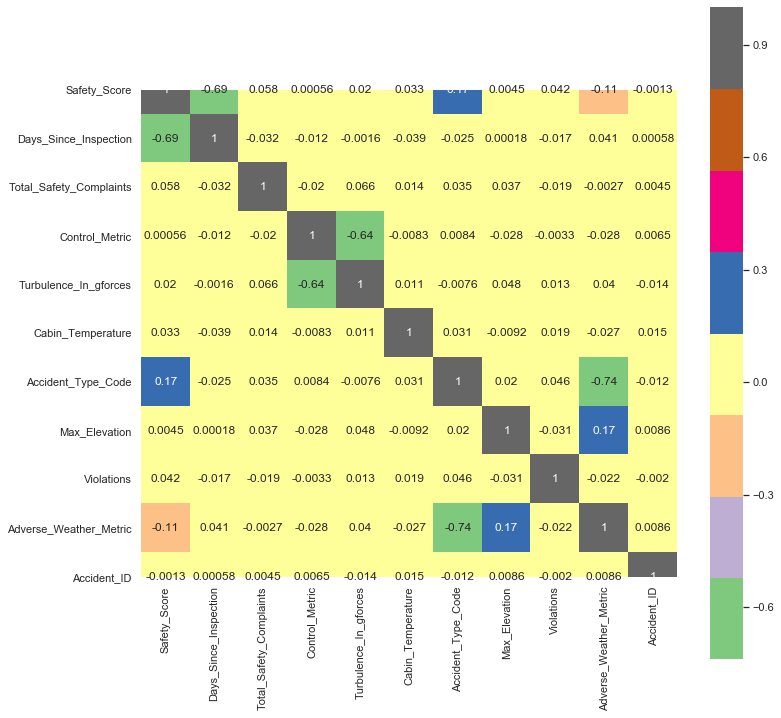

In [490]:
plt.figure(figsize = (12,12))
sns.heatmap(df_train.corr(), annot = True, cmap = 'Accent', square = True)

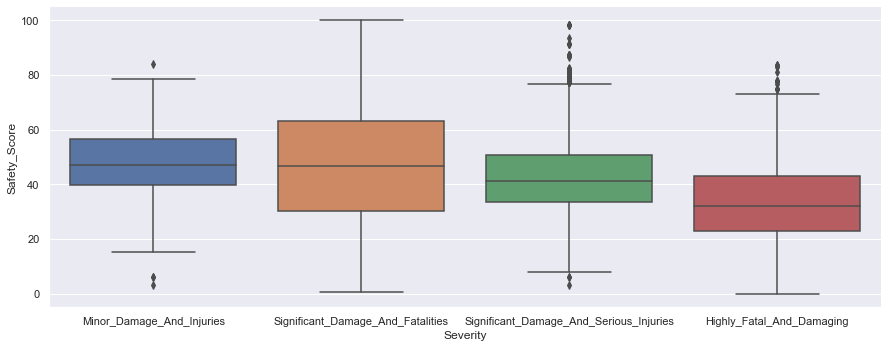

In [491]:
sns.factorplot(x = 'Severity', y = 'Safety_Score', data = df_train, aspect = 2.5, kind = 'box')

In [492]:
Scaler = StandardScaler()

In [493]:
features1 = df_train.drop('Severity', axis = 1)

In [494]:
df_train1 = Scaler.fit_transform(features1.values)

In [495]:
df_train1 = pd.DataFrame(df_train1, index = features1.index, columns = features1.columns)

In [496]:
df_train1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,0.455303,0.301981,2.214072,0.516733,-0.901749,-0.699134,-0.953964,-0.070649,0.949873,0.442701,0.361066
1,1.275888,-0.828082,2.931264,0.601122,0.349922,1.656279,-0.953964,-0.633736,-0.011732,0.253773,1.623674
2,1.312673,0.019465,1.353442,0.102462,-0.485516,-0.401990,1.674181,0.770528,0.949873,-0.661939,-1.131736
3,0.384562,-0.545566,0.349373,0.804422,-0.366593,0.659758,-0.428335,1.141883,-0.973336,-0.115208,-0.088796
4,-0.953841,0.019465,2.644388,-1.447221,1.316177,-1.018021,-0.428335,0.371883,-0.011732,-0.206638,0.772148


In [497]:
features = df_test

In [498]:
df_test1 = Scaler.fit_transform(features.values)

In [499]:
df_test1 = pd.DataFrame(df_test1, index = features.index, columns = features.columns )

In [500]:
df_test1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,-1.371727,0.866845,-0.080077,0.592957,0.109134,-0.616620,0.077985,0.586995,0.009034,-0.467493,-1.717412
1,1.004384,0.582969,-0.498014,-0.068431,-1.071998,-0.513424,1.676045,-0.230758,0.009034,-0.640138,-1.714913
2,-0.524519,0.582969,-0.498014,-0.056478,-0.338031,2.567706,1.143358,-1.561731,-0.972910,-0.636168,-1.713802
3,-2.367618,2.286227,-0.219389,0.086956,0.389769,0.319513,-0.454701,0.825254,0.009034,-0.131314,-1.712969
4,-1.901934,1.434598,-0.637327,-0.809504,-0.538484,-0.284919,-0.987388,0.328201,0.009034,0.600666,-1.711858


In [501]:
Y = df_train.iloc[:,0]

In [502]:
log = LogisticRegression()

In [503]:
log.fit(features1, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
predictions = log.predict(df_test)

In [505]:
predictions

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Highly_Fatal_And_Damaging', ..., 'Highly_Fatal_And_Damaging',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [506]:
acc_log = round(log.score(features1, Y) * 100, 2)


In [507]:
acc_log

52.8

In [518]:
svm = SVC()
svm.fit(features1, Y)
prediction1 = svm.predict(df_test)
acc_svm = round(svm.score(features1, Y) * 100, 2)
acc_svm1 = round(svm.score(df_test, prediction1)*100, 2)


In [519]:
print(acc_svm)
print(acc_svm1)

100.0
100.0


In [512]:
output = pd.DataFrame({'Accident_ID' : df_test.Accident_ID, 'Severity' : prediction1})

In [515]:
output.to_csv(r'C:\Users\User\Desktop\submission1.csv', index = False)